# ECS7020P mini-project submission

The mini-project has two separate components:


1.   **Basic component** [6 marks]: Using the MLEnd London Sounds dataset, build a machine learning pipeline that takes as an input an audio segment and predicts whether the audio segment has been recorded indoors or outdoors.
2.   **Advanced component** [10 marks]: Formulate your own machine learning problem and build a machine learning solution using the MLEnd London Sounds dataset. 

Your submission will consist of two Jupyter notebooks, one for the basic component and another one for advanced component. Please **name each notebook**:

* ECS7020P_miniproject_basic.ipynb
* ECS7020P_miniproject_advanced.ipynb

then **zip and submit them toghether**.

Each uploaded notebook should include: 

*   **Text cells**, describing concisely each step and results.
*   **Code cells**, implementing each step.
*   **Output cells**, i.e. the output from each code cell.

and **should have the structure** indicated below. Notebooks might not be run, please make sure that the output cells are saved.

How will we evaluate your submission?

*   Conciseness in your writing (10%).
*   Correctness in your methodology (30%).
*   Correctness in your analysis and conclusions (30%).
*   Completeness (10%).
*   Originality (10%).
*   Efforts to try something new (10%).

Suggestion: Why don't you use **GitHub** to manage your project? GitHub can be used as a presentation card that showcases what you have done and gives evidence of your data science skills, knowledge and experience. 

Each notebook should be structured into the following 9 sections:


# 1 Author

**Student Name**:  Karan Kaus
**Student ID**:  



# 2 Problem formulation

Describe the machine learning problem that you want to solve and explain what's interesting about it.

# 3 Machine Learning pipeline

Describe your ML pipeline. Clearly identify its input and output, any intermediate stages (for instance, transformation -> models), and intermediate data moving from one stage to the next. It's up to you to decide which stages to include in your pipeline. 

# 4 Transformation stage

Describe any transformations, such as feature extraction. Identify input and output. Explain why you have chosen this transformation stage.

# 5 Modelling

Describe the ML model(s) that you will build. Explain why you have chosen them.

# 6 Methodology

Describe how you will train and validate your models, how model performance is assesssed (i.e. accuracy, confusion matrix, etc)

# 7 Dataset

Describe the dataset that you will use to create your models and validate them. If you need to preprocess it, do it here. Include visualisations too. You can visualise raw data samples or extracted features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
import math

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa
import scipy.stats as stats

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [11]:
# !pip3 install seaborn
# !pip3 install tensorflow
import seaborn as sns
import soundfile as sf
import os, random, librosa
from tqdm.auto import tqdm
from IPython import display
import tensorflow as tf
from tensorflow.keras import layers, models, utils, callbacks
from keras.preprocessing.image import ImageDataGenerator
sns.set_style('darkgrid')

ECS7020P_miniproject_submission_2_CNN.ipynb
ECS7020P_miniproject_submission_2_pitch-Copy1.ipynb
ECS7020P_miniproject_submission_7_dec_stft.ipynb
ECS7020P_miniproject_submission_7_dec_testing.ipynb
ECS7020P_miniproject_submission_8_Dec_MFCC.ipynb
ECS7020P_miniproject_submission_advanced_cnn.ipynb
ECS7020P_miniproject_submission_advanced_stft.ipynb
ECS7020P_miniproject_submission_base.ipynb
mel_spectrograms
MLEnd_2022_Starter_kit.ipynb
MLEndLS
MLEndLS.csv


In [2]:
sample_path = 'MLEndLS/*.wav'
files = glob.glob(sample_path)
MLENDLS_df = pd.read_csv('./MLEndLS.csv').set_index('file_id') 

In [3]:
column_transformer = make_column_transformer(
    (OneHotEncoder(), ['in_out', 'area']),
    remainder='passthrough',
    verbose_feature_names_out=False
)

input_data = column_transformer.fit_transform(MLENDLS_df)
input_data = pd.DataFrame(data=input_data, columns=column_transformer.get_feature_names_out())

labels = MLENDLS_df['spot'].to_numpy()

input_data = input_data.drop(columns=[
    'Participant',
    'spot',
])

display(input_data)
display(labels)

,in_out_indoor,in_out_outdoor,area_Euston,area_british,area_campus,area_kensington,area_southbank,area_westend
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2495,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2496,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2497,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2498,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


array(['street', 'dinosaur', 'square', ..., 'national', 'room12',
       'room12'], dtype=object)

In [4]:
class config:
    CLASSES = np.array(MLENDLS_df['spot'].unique())
    MAX_EPOCHS = 500

In [5]:
def get_mel_spectrogram(sound_wave, sr, spec_h=128, spec_w=128, length=1):
    NUM_MELS = spec_h
    HOP_LENGTH = int(sr * length / (spec_w - 1)) 
    mel_spec = librosa.feature.melspectrogram(y=sound_wave, sr=sr, hop_length=HOP_LENGTH, n_mels=NUM_MELS)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db

class_distribution = []
spectrogram_samples = []
audio_samples = []

DATA = 'mel_spectrograms'

if not os.path.exists(DATA):
    os.mkdir(DATA)

for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    
    meta_info = MLENDLS_df.loc[fileID]
    
    dst_dir = os.path.join(DATA, meta_info['spot'])
    
    if not os.path.exists(dst_dir):
        os.mkdir(dst_dir)    

    waveform, sr = librosa.load(file)
    waveform = waveform[:143766]
    
    if len(waveform) < 143766: continue

    class_distribution.append(meta_info['spot'])
    dst_path = f"{os.path.join(dst_dir, file_name)}.png"
    
    plt.imsave(dst_path, get_mel_spectrogram(waveform, sr), cmap='gray')

    spectrogram_samples.append(dst_path)
    audio_samples.append(file_name)

print('done')

100%|██████████████████████████████████████| 2500/2500 [10:31<00:00,  3.96it/s]

done


NameError: name 'read_and_pad_sound_wave' is not defined

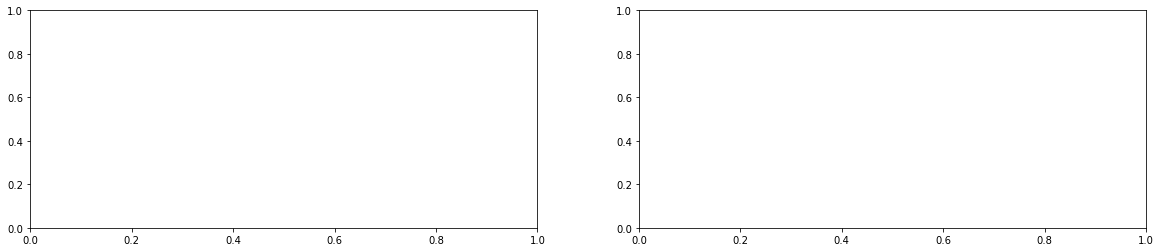

In [6]:
for i in range(10):
    fig, ax = plt.subplots(1,2, figsize=(20, 4))
    ax[0].plot(read_and_pad_sound_wave(audio_samples[i])[0])
    ax[1].imshow(plt.imread(spectrogram_samples[i]), cmap='gray')
    fig.suptitle(config.CLASSES[i], fontsize=15);

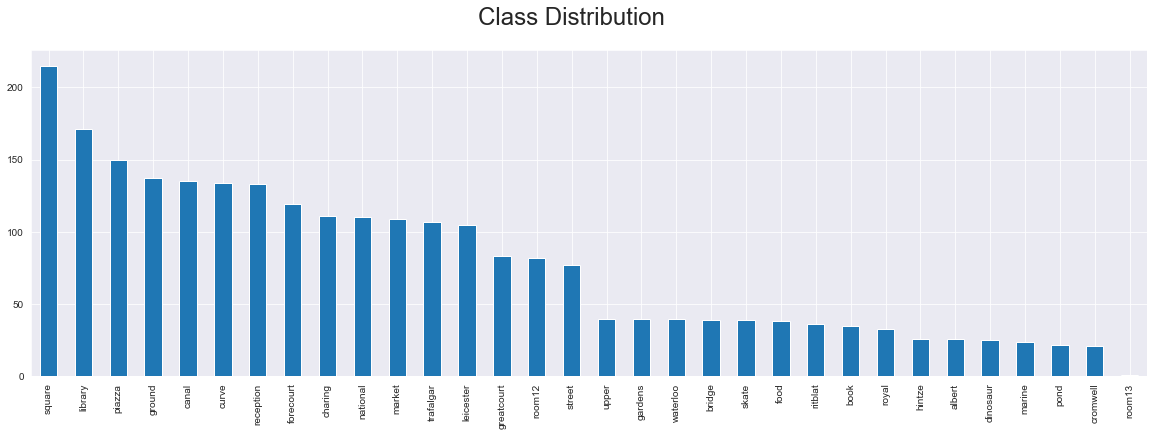

In [13]:
fig, ax = plt.subplots(figsize=(20, 6))
pd.Series(class_distribution).value_counts().plot.bar()
fig.suptitle('Class Distribution', fontsize=24);

In [12]:
image_size = (832, 128, 1)
datagen = ImageDataGenerator(validation_split=0.1)

training_set = datagen.flow_from_directory(
    DATA, target_size=image_size[:2],  batch_size=32, class_mode='categorical', color_mode='grayscale', subset='training'
)
validation_set = datagen.flow_from_directory(
    DATA, target_size=image_size[:2],  batch_size=32, class_mode='categorical', color_mode='grayscale', subset='validation'
)

Found 2235 images belonging to 32 classes.
Found 236 images belonging to 32 classes.


In [14]:
model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=image_size, padding='same'),
    layers.Conv2D(32, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(padding='same'),
    layers.Dropout(0.25),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(padding='same'),
    layers.Dropout(0.25),
    layers.GlobalAveragePooling2D(),
    layers.Dense(len(config.CLASSES), activation='softmax'),
])

model.summary()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                        

2022-12-09 10:04:10.850846: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 10:04:10.851193: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-09 10:04:10.851316: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-12-09 10:04:10.851408: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-12-09 10:04:10.851497: W tensorflow/c

In [15]:
utils.plot_model(model, show_shapes=True, expand_nested=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
es = callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

rlp = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-10, mode='min', verbose=1)

history = model.fit(
    training_set, validation_data=validation_set,
    epochs=config.MAX_EPOCHS, callbacks=[es, rlp], batch_size=8
)

Epoch 1/500
70/70 [==============================] - 53s 744ms/step - loss: 4.0524 - accuracy: 0.0564 - val_loss: 3.2822 - val_accuracy: 0.0890 - lr: 0.0010
Epoch 2/500
70/70 [==============================] - 57s 808ms/step - loss: 3.2599 - accuracy: 0.0707 - val_loss: 3.2816 - val_accuracy: 0.0551 - lr: 0.0010
Epoch 3/500
70/70 [==============================] - 56s 803ms/step - loss: 3.2442 - accuracy: 0.0694 - val_loss: 3.2242 - val_accuracy: 0.0890 - lr: 0.0010
Epoch 4/500
70/70 [==============================] - 55s 788ms/step - loss: 3.2245 - accuracy: 0.0931 - val_loss: 3.1522 - val_accuracy: 0.1017 - lr: 0.0010
Epoch 5/500
70/70 [==============================] - 56s 797ms/step - loss: 3.1800 - accuracy: 0.1056 - val_loss: 3.0756 - val_accuracy: 0.1568 - lr: 0.0010
Epoch 6/500
70/70 [==============================] - 56s 796ms/step - loss: 3.1509 - accuracy: 0.1114 - val_loss: 3.0473 - val_accuracy: 0.1568 - lr: 0.0010
Epoch 7/500
70/70 [==============================] - 57s 8

# 8 Results

Carry out your experiments here, explain your results.

  
  
--------------------------------------
--------------------------------------
--------------------------------------
  
  
  

# 9 Conclusions

Your conclusions, improvements, etc should go here